In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
import os

In [14]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
MASTER_PATH =  '/content/drive/My Drive/AirInvestor/'

DATA_PATH = MASTER_PATH + 'Mashvisor_data/'

OUTPUT_PATH = MASTER_PATH + 'output/'

CACHE_PATH = MASTER_PATH + 'cache_dir/'

In [16]:
%ls /content/drive/My\ Drive/AirInvestor/Mashvisor_data


Mashvisor_withCensus_CrimeV2.csv     rental_price_pred_brief.csv  test.csv
Mashvisor_withCensus_CrimeV2.gsheet  rental_price_pred.csv


In [17]:
# read and preprocess data
df_list = pd.read_csv(DATA_PATH + 'Mashvisor_withCensus_CrimeV2.csv')

df_list = df_list.drop_duplicates(['mls_id'])

df = df_list[['mls_id', 'description']].dropna()


# get rid of the data that have sentence length smaller than 5 words
df['length'] = df['description'].str.split().str.len()
df = df[df['length']>=5]

print("number of rows {}, number of unique ids {}, number of unique length {}".format(df.shape[0], len(set(df['mls_id'])), len(set(df['length']))))

df.head()

number of rows 413, number of unique ids 413, number of unique length 96


,mls_id,description,length
0,14259981,New Build by Stonehollow Homes. and almost com...,117
1,14259967,Beautiful Stonehollow Home on wide 1 ACRE with...,122
2,14316135,"Country Home built in 2008, nice condition, gr...",115
4,56522084,This incredible Beazer home features high ceil...,113
5,204484,3/2/2 BRICK HOME THAT WAS COMPLETLY REMODELED ...,51


count    413.000000
mean      72.380145
std       23.175529
min        8.000000
25%       63.000000
50%       75.000000
75%       81.000000
max      179.000000
Name: length, dtype: float64

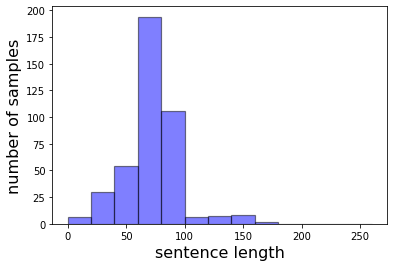

In [18]:
# visulize the distribution of the sentence length

bin_values = np.arange(start=0, stop=270, step=20)

n, bins, patches = plt.hist(df['length'], bin_values, facecolor='blue', alpha=0.5, edgecolor='black', linewidth=1.2)

plt.xlabel("sentence length", fontsize=16)
plt.ylabel('number of samples', fontsize=16)

df['length'].describe()


In [0]:
df[['mls_id','description']].to_csv(MASTER_PATH + 'Mashvisor_data/test.csv', index=False, header = True)
df_list.to_csv(DATA_PATH + 'Mashvisor_withCensus_CrimeV3.csv', index = False)

In [20]:
print(len(df_list['mls_id']), len(set(df_list['mls_id'])))

437 437
